<figure>
<img src="../Imagenes/logo-final-ap.png"  width="80" height="80" align="left"/> 
</figure>

# <span style="color:blue"><left>Aprendizaje Profundo</left></span>

# <span style="color:red"><center>Mapas Auto-organizados (SOM)</center></span>

<figure>
<center>
<img src="../Imagenes/Self-Organizing_Map.jpg" width="400" height="400" align="center"/>
<figcaption>self organizing map</figcaption>   
</center>
</figure>

Fuente: [Free image](https://commons.wikimedia.org/wiki/File:Self-Organizing_Map.jpg#/media/File:Self-Organizing_Map.jpg), via Wikimedia Commons

##   <span style="color:blue">Autores</span>

1. Alvaro Mauricio Montenegro Díaz, ammontenegrod@unal.edu.co
2. Daniel Mauricio Montenegro Reyes, dextronomo@gmail.com 

##   <span style="color:blue">Asesora Medios y Marketing digital</span>
 

4. Maria del Pilar Montenegro, pmontenegro88@gmail.com 

5. Oleg Jarma, ojarmam@unal.edu.co 
6. Laura Lizarazo, ljlizarazore@unal.edu.co 

## <span style="color:blue">Referencias</span>

1. Teuvo Kohonen, *Self-Organizing Maps*, Third edition, Springer, 2000.
1. Erkki Oja and Samuel Kaski editors, *Kohonen Maps*, Elsevier, 
1. Christopher Bishop, *Pattern Recognition and Machine learning*, Springer, 2006.
1. [Minisom](https://github.com/JustGlowing/minisom/tree/master/examples)

## <span style="color:blue">Contenido</span> 


- [Introducción](#Introducción)
- [Mapas cerebrales](#Mapas-cerebrales)
- [Cuantización vectorial](#Cuantización-vectorial])
- [Aprendizaje de cuantización vectorial](#Aprendizaje-de-cuantización-vectorial)
- [Algoritmo K-means](#Algoritmo-K-means)
- [Teselación de Voronoi](#Teselación-de-Voronoi)
- [El algortimo SOM](#El-algortimo-SOM)
- [Implementación de mapas auto-organizados con Minisom](#Implementación-de-mapas-auto-organizados-con-Minisom)
    - [Instalar Minisom](#Instalar-Minisom)

## <span style="color:blue">Introducción</span> 

<figure>
<center>
<img src="../Imagenes/Teuvo-Kohonen.jpg" width="300" height="300" align="center"/>
<figcaption> Teuvo Kohenen
</figcaption>
</center>
</figure>

Fuente: <a href="https://commons.wikimedia.org/wiki/File:Teuvo-Kohonen-2.jpg">AnonymousUnknown author</a>, <a href="https://creativecommons.org/licenses/by/4.0">CC BY 4.0</a>, via Wikimedia Commons

El profesor [Kohonen](https://es.wikipedia.org/wiki/Teuvo_Kohonen) hizo importantes investigaciones y contribuciones en el campo de las redes neuronales artificiales incluyendo el algoritmo LVQ y su más famosa contribución: los mapas auto organizados (también conocidas como redes de Kohonen o SOMs), así como también a las teorías fundamentales de la memoria asociativa distribuida y mapas asociativos óptimos, entre otros. La mayor parte de sus investigaciones las ha llevado a cabo en la que actualmente es la Universidad Aalto y ha recibido varios premios en reconocimiento a sus logros científicos. 

Estos dos  párrafos fueron tomados de [Wikipedia](https://en.wikipedia.org/wiki/Self-organizing_map#cite_note-4).

Un mapa autoorganizado (SOM) o mapa de características autoorganizadas (SOFM) es una técnica de aprendizaje automático no supervisada que se utiliza para producir una representación de baja dimensión (típicamente bidimensional) de un conjunto de datos de mayor dimensión mientras se preserva la estructura topológica de los datos. Por ejemplo, un conjunto de datos con $p$ variables medidas en $n$ observaciones podría representarse como grupos de observaciones con valores similares para las variables. Estos grupos luego podrían visualizarse como un "mapa" bidimensional de modo que las observaciones en los grupos proximales tengan valores más similares que las observaciones en los grupos distales. Esto puede hacer que los datos de alta dimensión sean más fáciles de visualizar y analizar.

Un SOM es un tipo de red neuronal artificial, pero se entrena mediante aprendizaje competitivo en lugar del aprendizaje de corrección de errores (por ejemplo, propagación hacia atrás con descenso de gradiente) utilizado por otras redes neuronales artificiales. El SOM fue presentado por el profesor finlandés Teuvo Kohonen en la década de 1980, por lo que a veces se lo denomina mapa de Kohonen o red de Kohonen. El mapa o red de Kohonen es una abstracción computacionalmente conveniente basada en modelos biológicos de sistemas neuronales de la década de 1970 y modelos de morfogénesis que se remontan a Alan Turing en la década de 1950.

## <span style="color:blue">Mapas cerebrales</span> 


<figure>
<center>
<img src="../Imagenes/brain_areas_2.png" width="600" height="600" align="center"/>
<figcaption> Areas del cerebro</figcaption>
</center>
</figure>


Fuente: Alvaro Montenegro, [basada en una imagen libre](https://upload.wikimedia.org/wikipedia/commons/f/f9/Diagram_showing_some_of_the_main_areas_of_the_brain_CRUK_188_notext.svg), vía  Wikipedia commons  

Las diversas áreas del cerebro, especialmente de la corteza cerebral, están organizadas de acuerdo con diferentes modalidades sensoriales:
1. Tareas especializadas: control del habla.
2. Señales sensoriales (visuales, auditivas, somatosensoriales).
3. ...

Entre las áreas sensoriales primarias (10% del área cortical) hay áreas asociativas, en las que convergen señales de diferentes modalidades.

$\leadsto$ Es posible distinguir **tres tipos de mapas**:


1. Mapas de habilidades característica específicas, cuya ubicación espacial no se correlaciona con ningún valor de característica.
1. Proyección anatómica sobre alguna superficie receptora . Por ejemplo: cortezas somáticas visuales.
1. Mapas ordenados de alguna característica abstracta, para la cual no existe una superficie de repetición. Por ejemplo, el color en el área visual.


$\leadsto$ Las principales estructuras de las redes cerebrales están determinadas genéticamente. Sin embargo, las proyecciones sensoriales se ven afectadas por la experiencia. Por ejemplo, después de la ablación de órganos sensoriales o tejidos cerebrales o la privación sensorial a una edad temprana, algunas proyecciones no se desarrollan.

A continuación se introducen los conceptos clave usado en la construcción de un SOM.

## <span style="color:blue">Cuantización vectorial</span>

`Vector Quantization` (Cuantificación Vectorial) es una técnica por la cual el espacio de entradas es dividido en un número determinado de regiones y para cada una de ellas es definido un vector que la caracteriza. Un espacio continuo tiene que ser discretizado. La entrada al sistema son vectores n-dimensionales y la salida es una representación discreta del espacio de entradas. El método Vector Quantization (LVQ) fue originalmente desarrollado por Linde (1980) y Gray (1984). Como una herramienta para compresión de datosel desarrollo se debe a por Gersho y Gray,1992.

Es una técnica usada para reducir la dimensionalidad de datos. Los datos originales constituyen un conjunto de vectores de dimensión $n$. Estos vectores son mapeados en un conjunto más pequeño de valores llamado `codebook` o libro de códigos. Tales valores son usados para almacenamiento o transmisión de información, con  alguna pérdida. 

En el proceso de entrenamiento, los vectores originales  son reubicados en valores en el libro de códigos de tal manera que se tratan de conservar de forma relativa  las distancias originales de los datos. La imagen muestra el espacio de representación de un libro de códigos. Este espacio se conoce como diagrama de Voronoi. Los puntos rojos son lo códigos del libro.

<figure>
<center>
<img src="../Imagenes/Voronoi_3.png" width="800" height="800" align="center"/>
<figcaption> Cuantización vectorial</figcaption>
</center>
</figure>


Fuente: Alvaro Montenegro, basado en <a href="https://commons.wikimedia.org/wiki/File:Voronoi_diagram.svg">Markus Matern</a>, Public domain, via Wikimedia Commons

## <span style="color:blue">Aprendizaje de cuantización vectorial</span>

`Learning Vector Quantization` (LVQ) es un método para el entrenamiento competitivo de una manera supervisada. Una capa competitiva automáticamente aprenderá a clasificar automáticamente vectores de entrada. Sin embargo, las clases que la capa competitiva encuentra dependen únicamente de los vectores de entrada. Si dos vectores de entrada son muy similares, la capa competitiva probablemente los colocará en la misma clase. No existe mecanismo en el diseño de una capa competitiva para dictaminar si cualquiera de los vectores de entrada están la misma clase o no. Las redes LVQ aprenden a clasificar vectores de entrada en clases seleccionadas por el usuario. Kohonen, diseñó versiones supervisadas de este método, para problemas de clasificación adaptativa de patrones. 


Matemáticamente, LVQ es un método de aproximación de señales en el cual se busca  elaborar una aproximación cuantizada de la distribución de los vectores de entrada. $x \in \mathfrak {R}^n $, usando un conjunto finito de  códigos  llamado *codebook*. Denotemos a los elementos del codebook como  $m_i \in \mathfrak {R} ^n, \quad i = 1,2, \ldots, k $ . 

Supongamos que ya he ha elegido  el *codebook*. Aproximar el vector  $x$ significa encontrar el vector $m_c$  en el *codebook* más cercano a $x$ (en el espacio de entrada), generalmente usando  la métrica euclidiana. Es decir, se busca encontrar $m_c$ tal que

$$
||x -m_c|| = \underset{i}{min} \{ ||x -m_i|| \}, \text{ o equivalentemente }
$$

$$
c =  \underset{i}{arg min} \{ ||x -m_i|| \}.
$$

$\leadsto$ Realmente, no es necesario utilizar la métrica euclidiana. Si existe una matriz de índices de similitud para medir la similitud entre los elementos de la muestra, el algoritmo puede usar esta medida de similitud para calcular la aproximación.

## <span style="color:blue">Algoritmo K-means</span>

Un algoritmo general que se puede utilizar para calcular un *codebook* a partir de una muestra es el algoritmo **k-means**. Este es un algoritmo de tipo esperanza-maximización (EM).

Supongamos que tenemos un conjunto de datos $ X = \{x_1, \ldots, x_N; \quad x_i \in \mathfrak {R} ^ n \} $. 

El objetivo es dividir el conjunto de datos en un número de clústeres de $K$, para un valor de $ K $ dado.


Denotemos por $ m_k,  k = 1, \ldots, K $ al código asociado con el grupo $ k $-th. Para cada punto  $ x_n $ introducimos un vector de variables binarias $ r_{nk} \in \{0,1 \} $, donde $ k = 1, \ldots, K $, la indica a cuál de los $ K $ clústeres  está asignado el punto $ x_n $.

La función objetivo (pérdida) se define como

$$
J = \sum_{n=1}^{N}\sum_{k=1}^{K} r_{nk}||x_n-m_k||^2.
$$

Intuitivamente, esperamos que cada grupo contenga un conjunto de puntos  cuyas distancias entre puntos sean pequeñas en comparación con las distancias a puntos fuera del grupo.

### <span style="color:#4CC9F0">El algoritmo</span>

1. Escoger aleatoriamente algunos valores $m_k$.
2. **Paso E**. Para cada  $x_n$ sea $r_{nk}=1$, tal que $k =  \underset{i}{arg min} \{ ||x -m_i||$, y $r_{nl}=0$ para $l\ne k$.
3. **Paso M**. La función objetivo $J$ es cuadrática, así que solamente tiene un mínimo. El extremo se puede calcular directamente minimizando $J$ para obtener

$$
m_k = \frac{\sum_n r_{nk}x_n}{\sum_n r_{nk}}.
$$

Los pasos 2 y 3 se repiten hasta convergencia.

## <span style="color:blue">Teselación de Voronoi</span>

La siguiente figura ejemplifica un espacio bidimensional donde un número finito de libro de códigos o `vectores de referencia` se muestra como puntos, correspondientes a sus coordenadas. Este espacio está dividido en regiones, delimitado por líneas (en general hiperplanos) de modo que cada partición contiene un vector de referencia que es el `vecino más cercano` en promedio a cualquier vector dentro de la misma partición. Estas líneas constituyen la teselación de Voronoi.

<figure>
<center>
<img src="../Imagenes/Voronoi_tessellation.png" width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Teselación de Voronoi</p>
</figcaption>
</figure>

Fuente:  <a href="https://commons.wikimedia.org/wiki/File:2Ddim-L2norm-10site.png">Augochy at English Wikipedia</a>, Public domain, via Wikimedia Commons

### <span style="color:#4CC9F0">Conjunto de Voronoi</span>

Se dice que todos los vectores $ x $ que tienen un vector de referencia particular como su vecino más cercano en la partición correspondiente de la teselación de Voronoi constituyen el conjunto de Voronoi. El propósito con los mapas auto-organizados (SOM) es construir una especie de teselación de la nube de puntos de entrada.

## <span style="color:blue">Mapas Auto-Organizados de Kohonen (SOM)</span>

Los mapas auto organizados (SOM), también conocidos como mapas de Kohonen, son un tipo de redes neuronales artificiales capaces de convertir relaciones estadísticas complejas y no lineales entre elementos de datos de alta dimensión en relaciones geométricas simples en una grilla de baja dimensión. 


En un SOM, las neuronas están organizadas en una grilla, por lo general bidimensional, aunque puede ser de mayor dimensión,  y cada neurona está completamente conectada a todos los nodos de origen en la capa de entrada. Una ilustración de [Matias Carrasco Kind y Robert J. Brunner](https://arxiv.org/pdf/1312.5753.pdf)  es la siguiente

<figure>
<center>
<img src="../Imagenes/som.png" width="800" height="800" align="center"/>
</center>
</figure>

Fuente: Alvaro Montenegro. Basado en una imagen de [Matias Carrasco Kind y Robert J. Brunner](https://arxiv.org/pdf/1312.5753.pdf)

La idea central de Kohonen fue preservar hasta donde fuera posible la estructura topológica de los datos. Es decir, es busca una representación de los datos en la grilla de las neuronas de tal manera que las distancias relativas de los puntos se preservan en la grilla.

Entonces se predefine la grilla de neuronas y el procedimiento busca asignar una celda de la grilla, es decir una neurona, a cada punto de entrada. 

La siguiente imagen ilustra como un SOM trata de representar a un conjunto de puntos. En la derecha se dibujan los puntos en la grilla. Se observa una celda (neurona) puede representar a varios puntos. En otras palabras, la proyección no es 1:1, debido a que en general habrá muchos más puntos de datos que neuronas. También puede ocurrir que algunas neuronas no reciban datos proyectados en ella.

En la imagen las neuronas están representadas en una grilla de celdas rectangulares. Son usuales también grillas exagonales y otra representaciones. Para mantener la sencillez, vamos a trabajar con grillas de neuronas bidimensionales.


<figure>
<center>
<img src="../Imagenes/som_topology.JPG" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Estructura latente representada por el  mapa autoorganizado</p>
</figcaption>
</figure>

Fuente: Alvaro Montenegro. Basada en  <a href="https://commons.wikimedia.org/wiki/File:Algorithme_som.JPG">I, Hetel</a>, <a href="http://creativecommons.org/licenses/by-sa/3.0/">CC BY-SA 3.0</a>, via Wikimedia Commons


Vamos a suponer una configuración de $N= p\times q$ en la grilla de salida. Cada neurona $i$ tiene asociada una par de coordenadas enteras, digamos $(i_1,i_2)$ y estan organizadas de tal manera que por ejemplo la neurona más a la izquierda y arriba tiene coordenada (0,0) y la mas a la derecha abajo (p-1, q-1). 

Estas coordenadas permiten definir el concepto de función vecindad de una neurona. 


### <span style="color:#4CC9F0">Función de vecindad</span>

Para una neurona, digamos $i, i=1,\cdots,N$, su función de vecindad define su cercanía con las demás neuronas, la cual es una función de la diferencia entre sus coordenadas. 

La función de vecidad más comúnmente usada es el kernel Gaussiano. Por ejemplo para la neurona $i$, con coordenadas $n_i=(i_1,i_2)$, su función de vecindad se define por

$$
h_{ij} = \exp \left( -\frac{|| n_i-n_j||^2}{2\sigma^2} \right)
$$

En el proceso de entrenamiento la función de vecindad cambia en cada paso $t$. Normalmente esa función de vecindad es cada vez mas restringida. Entonces el parámetro de dispersión $\sigma$ depende del tiempo en el proceso de entrenamiento. Por esto, en general escribiremos que las función de vecindad depende del tiempo y se escribirá

$$
h_{ij}(t) = \exp \left( -\frac{|| n_i-n_j||^2}{2\sigma^2(t)} \right),
$$

en donde se espera que $\sigma^2(t)\to 0$ cuando $t\to \infty$. Así la *vecindad* de la neurona  se va encogiendo a medida que avanza el entrenamiento.

No olvide que el concepto de vecindad es de las neuronas y su cálculo se basa en la posición de las neuronas en la grilla predefinida para el entrenamiento.

Un ejemplo de cálculo es el siguiente. Supongamos que $n_i=(2,3)$ y $n_j=(5,2)$. Además supongamos que $\sigma^2(t) = 0.2$ para algún paso $t$ en el entrenamiento. Entonces, se tiene que

$$
h_{ii}(t) = 1, 
$$
debido a que el exponente es cero. Además,

$$
h_{ij}(t) =  \exp \left( -\frac{|| n_i-n_j||^2}{2\sigma^2(t)} \right) = \exp \left( -\frac{(2-5)^2 + (3-2)^2}{2\times 0.2} \right) = 1.389\times 10^{-11}.
$$

La imagen ilustra el concepto de vecindad.


<figure>
<center>
<img src="../Imagenes/som_neighborhood.png"" width="400" height="400" align="center"/>
</center>
<figcaption>
<p style="text-align:center">Vecindad en un SOM. Medidad de vecidad (Ve) para una matriz rectangular. Ve = 1 entre puntos negros, Ve= 0.5 entre negros y rojos, Ve = 0.25 entre negros y  en azules, ...</p>
</figcaption>
</figure>

Fuente: 

### <span style="color:#4CC9F0">Rata de aprendizaje</span>

Como es usual en los algoritmos de entrenamiento de redes neuronales se define una rata de aprendizaje que dosifica el tamaño (la norma)  del gradiente en el proceso de búsqueda de un óptimo. Kohonen se basó inicialmente en la técnica del gradiente descendiente estocástico propuesta por [Robbins-Monro](https://projecteuclid.org/journals/annals-of-mathematical-statistics/volume-22/issue-3/A-Stochastic-Approximation-Method/10.1214/aoms/1177729586.full) . 

Robbins-Monro propusieron que en cada paso del algoritmo se seleccione de forma aleatoria una  muestra unitaria de los datos para presentarla al optimizadory que la rata de entrenamiento sea definida de tal manera que si la rata en el paso $t$ es $r(t)$ entonces $\sum r(t)\to \infty $ y $\sum r^2(t)<\infty$. Por ejemplo es usual definir $r(t) = 1/t$. Bajo esta condiciones el algortimo converge a un valor optimal con probabilidad 1.

### <span style="color:#4CC9F0">Pesos sinápticos</span>

<figure>
<center>
<img src="../Imagenes/som.png" width="800" height="800" align="center"/>
</center>
</figure>

Fuente: Alvaro Montenegro. Basado en una imagen de [Matias Carrasco Kind y Robert J. Brunner](https://arxiv.org/pdf/1312.5753.pdf)

De acuerdo con lo dicho antes, todas las neuronas en la grilla de las neuronas del SOM, se conectan con todas las neuronas a la entrada de los estímulos(datos de entrada). Entonces, si el SOM tiene en total $K$ neuronas y los vectores de entrada tiene dimensión $m$, las conexiones, que se conocen como `pesos sinápticos`, son en total $K\times m$. 

La matriz $\boldsymbol{W}_{K\times m}$ se usa para representar todos los pesos sinápticos. El objetivo del proceso de entrenamiento es `aprender` o estimar  estos pesos.

### <span style="color:#4CC9F0">Asignación de los datos a las neuronas en el SOM</span>

 Una vez la red está entrenada, la asignación se hace de la siguiente forma. La fila $i$ de la matriz $W$ representa el vector de pesos sinápticos asociado la neurona $i$. Estos vectores están en el mismo espacio del conjunto de entrenamiento. Se calcula la distancia geométrica entre el patrón $x$ que está entrando a la red en ese momento y cada fila de  $W$. La neurona seleccionada es aquella que está a menor distancia. En otras palabras, la neurona $i$ se selecciona si
 
$$
||x-w_i|| = min_{j} ||x-w_j||, j=1,\ldots,K.
$$ 

Tambien se puede escribir 

$$
i = \arg \min_{j}||x-w_j||.
$$

## <span style="color:blue">El algortimo de entrenamiento SOM</span>

En esta sección se describe el algoritmo base desarrollado por Kohonen teniendo en cuenta las siguientes consideraciones.

* Usaremos un SOM con cuadrícula rectangular bidimensional de $ N $ neuronas. También se pueden usar otras opciones, como cuadrículas hexagonales.
* Cada uno de las $N$ neuronas  está parametrizada por un par de coordenadas enteras $(i_1,i_2)$, que corresponde a su posición en la grilla que define el mapa.
* Usaremos como función de vecindad, el kernel Gaussiano $h_{ij}(t)$ definido arriba. Existen muchas posibilidades para definir la función de vecindad.
* definimos una rata de aprendizaje $\alpha(t)$, siguiendo el algortimo de Robbins-Monro.
* Sea $\sigma^2$ un valor inicial para el parámetro de dispersión de la función de vecindad. Definimos $\sigma^2(t)= \alpha(t)\sigma^2$. 

El algoritmo de entrenamiento es como sigue.


<figure>
<center>
<img src="../Imagenes/som_learning_rule.jpg" width="400" height="400" align="centert"/>
<figcaption>Regla de aprendizaje en un mapa auto-organizado</figcaption>
</center>
</figure>

Fuente: [Luciano da F. Costa, Research gate](https://www.researchgate.net/publication/340257021_Neurons_as_Pattern_Recognizers_CDT-25/figures?lo=1)

1. Inicializar los pesos sinápticos de las neuronas de manera aleatoria. Es decir la matriz $W$ se inicializa aleatoriamente.
1. Obtenga una muestra aleatoria $x$ del conjunto de entrenamiento $X$ y seleccione para este patrón  la mejor neurona $i$ como 
$$
i = \arg \min_{j}||x-w_j||
$$
1. En el tiempo $t+1$ actualice todos los pesos sinápticos de la siguiente forma
$$
w_j^{(t+1)} = w_j^{(t)} - \alpha(t)\times h_{ij}(t)\times (w_j-x)
$$
1. Repita los pasos 2 y 3 hasta completar un número de épocas o cumplir un criterio de convergencia.

### <span style="color:#4CC9F0">Nota</span>

El algoritmo es una generalización del gradiente descendiente estocástico. La presencia de la función de vecindad tiene el efecto de disminuir el efecto del gradiente de acuerdo con la función de vecindad. Las neuronas vecinas más cercanas a la ganadora reciben una valor relativo más grande de actualización. Es decir, neuronas lejanas a la ganadora reciben la señal de actualización cada vez mas atenuada.

## <span style="color:blue">Implementacion de mapas auto-organizados con Minisom</span> 

### <span style="color:#4CC9F0">Un primer ejemplo histórico. Gráfico de la pobreza</span>


<figure>
<center>
<img src="../Imagenes/poverty.png" width="600" height="500" align="center"/>
</center>
<figcaption>
<p style="text-align:center"> Ejemplo histórico. Mapa de la probreza</p>
</figcaption>
</figure>


Fuente: Kohonen. [Poverty map](http://www.cis.hut.fi/research/som-research/worldmap.html), 1997.

### <span style="color:#4CC9F0">Instalar Minisom</span>

In [ ]:
#!pip install minisom

### <span style="color:#4CC9F0">Códigos con Minisom</span>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from minisom import MiniSom 


Ahora generamos y visualizamos algunos conjuntos de datos con Minisom.


MiniSom implementa dos tipos de entrenamiento.

1. El entrenamiento secuencial, implementado por el método *train_random*, donde el modelo se entrena seleccionando muestras aleatorias de sus datos.
1. El entrenamiento por lotes, implementado por el método *train_batch*, donde las muestras se seleccionan en el orden en que se almacenan.

Los pesos de la red se inicializan aleatoriamente de forma predeterminada.  

Se proporcionan dos métodos adicionales para inicializar los pesos de una manera basada en datos: *random_weights_init* y *pca_weights_init*.

Para obtener una descripción general de todas las funciones implementadas en Minisom, puede examinar los siguientes ejemplos en Github: 
https://github.com/JustGlowing/minisom/tree/master/examples


En lo que sigue, el error de cuantización (quatization error)es el error de reconstrucción y es dado por

$$
q_err = \frac{1}{N} \sum ||x-w_j||^2
$$,

en donde la suma es sobre los $x$'s y en donde $w_j$ es el correspondiente prototipo de $x$.


In [2]:
import sys
sys.path.insert(0, '../')

In [4]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
%matplotlib inline

%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### <span style="color:#4CC9F0">Dígitos a mano alzada</span>

Eso son son los datos de MNIST. Probablemente es un subconjunto.

In [1]:
import sys
sys.path.insert(0, '../')

from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload

In [2]:
%autoreload 2
from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

In [3]:
digits.data.shape

(1797, 64)

In [8]:
%autoreload 2
from sklearn import datasets
from sklearn.preprocessing import scale

# load the digits dataset from scikit-learn
digits = datasets.load_digits(n_class=10)
data = digits.data  # matrix where each row is a vector that represent a digit.
data = scale(data)
num = digits.target  # num[i] is the digit represented by data[i]

In [9]:
som = MiniSom(30, 30, 64, sigma=4,
              learning_rate=0.5, neighborhood_function='triangle')
som.pca_weights_init(data)
print("Training...")
som.train_random(data, 5000, verbose=False)  # random training
print("\n...ready!")

Training...

...ready!


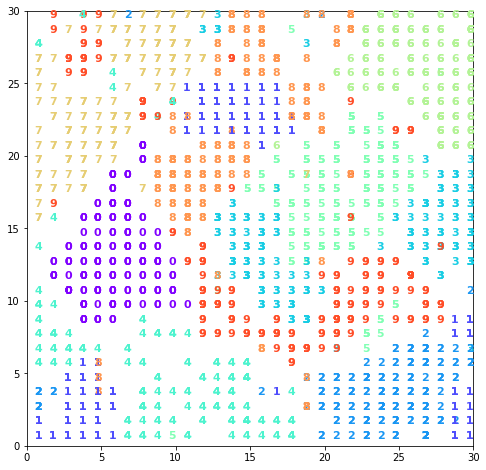

In [10]:
plt.figure(figsize=(8, 8))
wmap = {}
im = 0
for x, t in zip(data, num):  # scatterplot
    w = som.winner(x)
    wmap[w] = im
    plt. text(w[0]+.5,  w[1]+.5,  str(t),
              color=plt.cm.rainbow(t / 10.), fontdict={'weight': 'bold',  'size': 11})
    im = im + 1
plt.axis([0, som.get_weights().shape[0], 0,  som.get_weights().shape[1]])
plt.savefig('../Imagenes/som_digts.png')
plt.show()

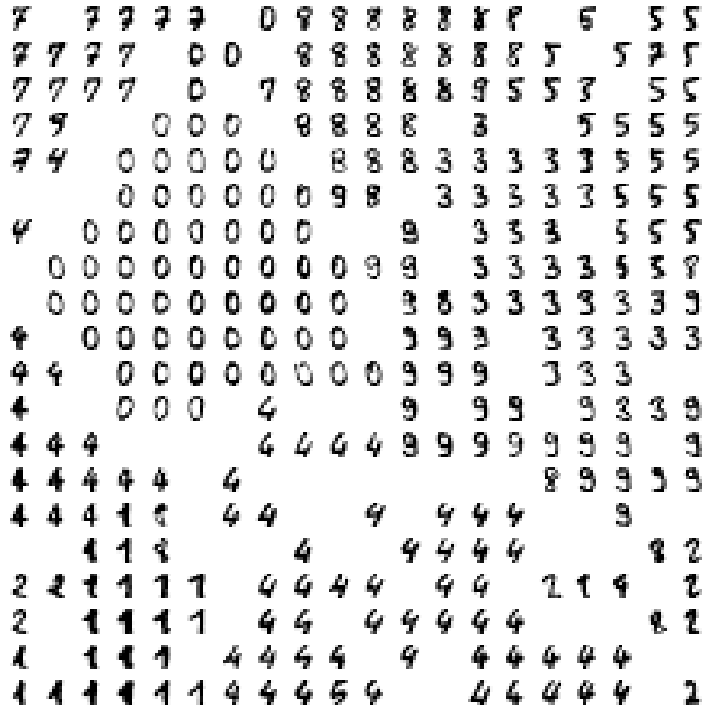

In [11]:
plt.figure(figsize=(10, 10), facecolor='white')
cnt = 0
for j in reversed(range(20)):  # images mosaic
    for i in range(20):
        plt.subplot(20, 20, cnt+1, frameon=False,  xticks=[],  yticks=[])
        if (i, j) in wmap:
            plt.imshow(digits.images[wmap[(i, j)]],
                       cmap='Greys', interpolation='nearest')
        else:
            plt.imshow(np.zeros((8, 8)),  cmap='Greys')
        cnt = cnt + 1

plt.tight_layout()
plt.savefig('../Imagenes/som_digts_imgs.png')
plt.show()

### <span style="color:#4CC9F0">Índice de democracia</span>

Fragmento tonmado y traducido de [Wikipedia](https://en.wikipedia.org/wiki/Democracy_Index#:~:text=The%20Democracy%20Index%20is%20an,the%20weekly%20newspaper%20The%20Economist.).
The Índice de democracia es un índice compilado por Economist Intelligence Unit (EIU), la división de investigación de Economist Group, una empresa privada con sede en el Reino Unido que publica el semanario The Economist. Similar a un Índice de Desarrollo Humano pero centrado en las instituciones y libertades políticas, el índice intenta medir el estado de la democracia en 167 países y territorios, de los cuales 166 son estados soberanos y 164 son estados miembros de la ONU.

El índice se basa en 60 indicadores agrupados en cinco categorías diferentes, que miden el pluralismo, las libertades civiles y la cultura política. Además de una puntuación numérica y una clasificación, el índice clasifica a cada país en uno de cuatro tipos de régimen: democracias plenas, democracias defectuosas, regímenes híbridos y regímenes autoritarios. El primer informe del Índice de Democracia se publicó en 2006. Los informes se publicaron cada dos años hasta 2010 y, posteriormente, anualmente.

In [4]:
import sys
sys.path.insert(0, '../')
%load_ext autoreload

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
%matplotlib inline

from minisom import MiniSom
from sklearn.preprocessing import minmax_scale, scale
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# download from wikipedia and reorganization
 # pre-downloaded file
democracy_index = pd.read_csv('../Datos/democracy_index.csv')

In [6]:
democracy_index.head()

Unnamed: 0 rank      country  democracy_index  \
0           0    1       Norway             9.87   
1           1    2      Iceland             9.58   
2           2    3       Sweden             9.39   
3           3    4  New Zealand             9.26   
4           4    5      Denmark             9.22   

   electoral_processand_pluralism  functioning_of_government  \
0                           10.00                       9.64   
1                           10.00                       9.29   
2                            9.58                       9.64   
3                           10.00                       9.29   
4                           10.00                       9.29   

   political_participation  political_culture  civil_liberties        category  
0                    10.00              10.00             9.71  Full democracy  
1                     8.89              10.00             9.71  Full democracy  
2                     8.33              10.00             9.41  Full democracy  
3                     8.89               8.13            10.00  Full democracy  
4                     8.33               9.38             9.12  Full democracy

In [7]:
category_color = {'Full democracy': 'darkgreen',
                  'Flawed democracy': 'limegreen',
                  'Hybrid regime': 'darkorange',
                  'Authoritarian': 'crimson'}
colors_dict = {c: category_color[dm] for c, dm in zip(democracy_index.country,
                                                      democracy_index.category)}

In [8]:
country_codes = {'Afghanistan': 'AF',
 'Albania': 'AL',
 'Algeria': 'DZ',
 'Angola': 'AO',
 'Argentina': 'AR',
 'Armenia': 'AM',
 'Australia': 'AU',
 'Austria': 'AT',
 'Azerbaijan': 'AZ',
 'Bahrain': 'BH',
 'Bangladesh': 'BD',
 'Belarus': 'BY',
 'Belgium': 'BE',
 'Benin': 'BJ',
 'Bhutan': 'BT',
 'Bolivia': 'BO',
 'Bosnia and Herzegovina': 'BA',
 'Botswana': 'BW',
 'Brazil': 'BR',
 'Bulgaria': 'BG',
 'Burkina Faso': 'BF',
 'Burundi': 'BI',
 'Cambodia': 'KH',
 'Cameroon': 'CM',
 'Canada': 'CA',
 'Cape Verde': 'CV',
 'Central African Republic': 'CF',
 'Chad': 'TD',
 'Chile': 'CL',
 'China': 'CN',
 'Colombia': 'CO',
 'Comoros': 'KM',
 'Costa Rica': 'CR',
 'Croatia': 'HR',
 'Cuba': 'CU',
 'Cyprus': 'CY',
 'Czech Republic': 'CZ',
 'Democratic Republic of the Congo': 'CD',
 'Denmark': 'DK',
 'Djibouti': 'DJ',
 'Dominican Republic': 'DO',
 'Ecuador': 'EC',
 'Egypt': 'EG',
 'El Salvador': 'SV',
 'Equatorial Guinea': 'GQ',
 'Eritrea': 'ER',
 'Estonia': 'EE',
 'Ethiopia': 'ET',
 'Fiji': 'FJ',
 'Finland': 'FI',
 'France': 'FR',
 'Gabon': 'GA',
 'Gambia': 'GM',
 'Georgia': 'GE',
 'Germany': 'DE',
 'Ghana': 'GH',
 'Greece': 'GR',
 'Guatemala': 'GT',
 'Guinea': 'GN',
 'Guinea-Bissau': 'GW',
 'Guyana': 'GY',
 'Haiti': 'HT',
 'Honduras': 'HN',
 'Hong Kong': 'HK',
 'Hungary': 'HU',
 'Iceland': 'IS',
 'India': 'IN',
 'Indonesia': 'ID',
 'Iran': 'IR',
 'Iraq': 'IQ',
 'Ireland': 'IE',
 'Israel': 'IL',
 'Italy': 'IT',
 'Ivory Coast': 'IC',
 'Jamaica': 'JM',
 'Japan': 'JP',
 'Jordan': 'JO',
 'Kazakhstan': 'KZ',
 'Kenya': 'KE',
 'Kuwait': 'KW',
 'Kyrgyzstan': 'KG',
 'Laos': 'LA',
 'Latvia': 'LV',
 'Lebanon': 'LB',
 'Lesotho': 'LS',
 'Liberia': 'LR',
 'Libya': 'LY',
 'Lithuania': 'LT',
 'Luxembourg': 'LU',
 'Macedonia': 'MK',
 'Madagascar': 'MG',
 'Malawi': 'MW',
 'Malaysia': 'MY',
 'Mali': 'ML',
 'Malta': 'MT',
 'Mauritania': 'MR',
 'Mauritius': 'MU',
 'Mexico': 'MX',
 'Moldova': 'MD',
 'Mongolia': 'MN',
 'Montenegro': 'ME',
 'Morocco': 'MA',
 'Mozambique': 'MZ',
 'Myanmar': 'MM',
 'Namibia': 'NA',
 'Nepal': 'NP',
 'Netherlands': 'NL',
 'New Zealand': 'NZ',
 'North Macedonia': 'NM',
 'Nicaragua': 'NI',
 'Niger': 'NE',
 'Nigeria': 'NG',
 'North Korea': 'KP',
 'Norway': 'NO',
 'Oman': 'OM',
 'Pakistan': 'PK',
 'Palestine': 'PS',
 'Panama': 'PA',
 'Papua New Guinea': 'PG',
 'Paraguay': 'PY',
 'Peru': 'PE',
 'Philippines': 'PH',
 'Poland': 'PL',
 'Portugal': 'PT',
 'Qatar': 'QA',
 'Republic of China (Taiwan)': 'TW',
 'Republic of the Congo': 'CG',
 'Romania': 'RO',
 'Russia': 'RU',
 'Rwanda': 'RW',
 'Saudi Arabia': 'SA',
 'Senegal': 'SN',
 'Serbia': 'RS',
 'Sierra Leone': 'SL',
 'Singapore': 'SG',
 'Slovakia': 'SK',
 'Slovenia': 'SI',
 'South Africa': 'ZA',
 'South Korea': 'KR',
 'Spain': 'ES',
 'Sri Lanka': 'LK',
 'Sudan': 'SD',
 'Suriname': 'SR',
 'Swaziland': 'SZ',
 'Sweden': 'SE',
 'Switzerland': 'CH',
 'Syria': 'SY',
 'Tajikistan': 'TJ',
 'Tanzania': 'TZ',
 'Thailand': 'TH',
 'Timor-Leste': 'TL',
 'Togo': 'TG',
 'Trinidad and Tobago': 'TT',
 'Tunisia': 'TN',
 'Turkey': 'TR',
 'Turkmenistan': 'TM',
 'Uganda': 'UG',
 'Ukraine': 'UA',
 'United Arab Emirates': 'AE',
 'United Kingdom': 'GB',
 'United States': 'US',
 'Uruguay': 'UY',
 'Uzbekistan': 'UZ',
 'Venezuela': 'VE',
 'Vietnam': 'VN',
 'Yemen': 'YE',
 'Zambia': 'ZM',
 'Zimbabwe': 'ZW'}

In [9]:
feature_names = ['democracy_index', 'electoral_processand_pluralism', 'functioning_of_government',
                 'political_participation', 'political_culture', 'civil_liberties']

X = democracy_index[feature_names].values
X = scale(X)

size = 15
som = MiniSom(size, size, len(X[0]),
              neighborhood_function='gaussian', sigma=1.5,
              random_seed=1)

som.pca_weights_init(X)
som.train_random(X, 1000, verbose=False)

#### Mapa de los países de acuerdo con el índice de democracia


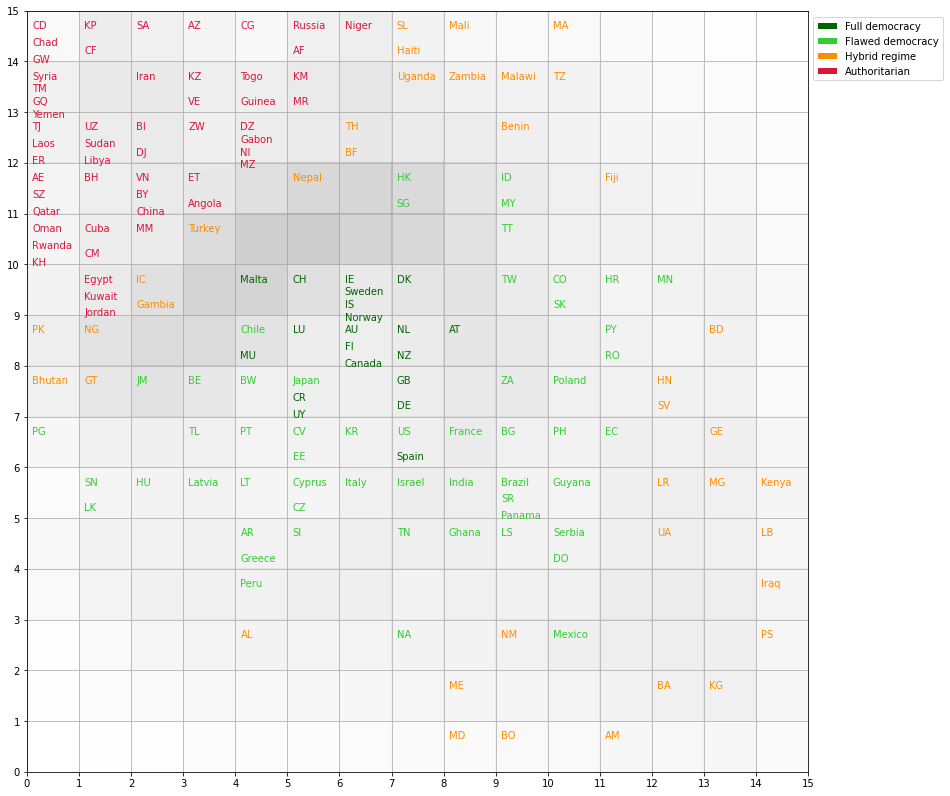

In [10]:
def shorten_country(c):
    if len(c) > 6:
        return country_codes[c]
    else:
        return c

country_map = som.labels_map(X, democracy_index.country)
    
plt.figure(figsize=(14, 14))
for p, countries in country_map.items():
    countries = list(countries)
    x = p[0] + .1
    y = p[1] - .3
    for i, c in enumerate(countries):
        off_set = (i+1)/len(countries) - 0.05
        plt.text(x, y+off_set, shorten_country(c), color=colors_dict[c], fontsize=10)
plt.pcolor(som.distance_map().T, cmap='gray_r', alpha=.2)
plt.xticks(np.arange(size+1))
plt.yticks(np.arange(size+1))
plt.grid()

legend_elements = [Patch(facecolor=clr,
                         edgecolor='w',
                         label=l) for l, clr in category_color.items()]
plt.legend(handles=legend_elements, loc='center left', bbox_to_anchor=(1, .95))
plt.show()

#### Planos de características 

Este es un mapa de calor que se basa en promediar los valores de los pesos sinápticos $w_{ij}$ en la celda $i$.

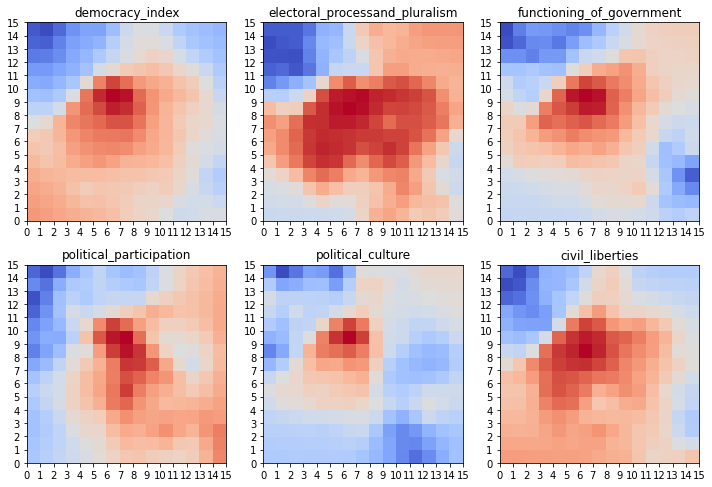

In [19]:
W = som.get_weights()
plt.figure(figsize=(10, 10))
for i, f in enumerate(feature_names):
    plt.subplot(3, 3, i+1)
    plt.title(f)
    plt.pcolor(W[:,:,i].T, cmap='coolwarm')
    plt.xticks(np.arange(size+1))
    plt.yticks(np.arange(size+1))
plt.tight_layout()
plt.show()

In [15]:
W.shape

(15, 15, 6)

#### Plano de Características más importantes

En este caso se coloca un úncio color que corresponde a la característica con mayor peso $w_{ij}$ en la celda $i$.

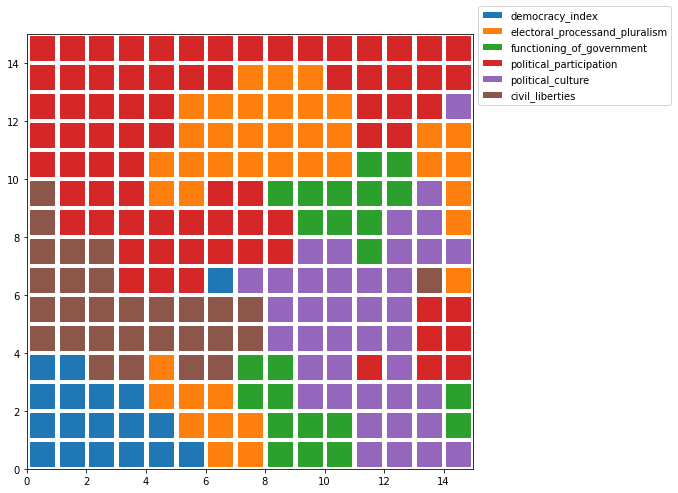

In [21]:
Z = np.zeros((size, size))
plt.figure(figsize=(8, 8))
for i in np.arange(som._weights.shape[0]):
    for j in np.arange(som._weights.shape[1]):
        feature = np.argmax(W[i, j , :])
        plt.plot([j+.5], [i+.5], 'o', color='C'+str(feature),
                 marker='s', markersize=24)

legend_elements = [Patch(facecolor='C'+str(i),
                         edgecolor='w',
                         label=f) for i, f in enumerate(feature_names)]

plt.legend(handles=legend_elements,
           loc='center left',
           bbox_to_anchor=(1, .95))
        
plt.xlim([0, size])
plt.ylim([0, size])
plt.show()